# Exercise 2:
Read the dataset.
Explore the data with the summary statistics and different Visualizations. Decide and justify
which attributes you will keep to predict whether a person will survive. Pay a special attention
to attributes with missing values and explain how you are going to handle them.
If a predictor always predicts “will not survive”, what will be its probability to be correct?
Explain your answer.

# Dataset

In [171]:
import pandas as pd
titanic = pd.read_csv('~/Nextcloud/Uni/Maschinelles Lernen/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Notes:
### - pclass: sozioökonomischer Status:
    1 = Upper
    2 = Middle
    3 = Lower

### - sibsp: familiäre Beziehungen:
    Sibling = Bruder, Schwester, Stiefbruder, Stiefschwester
    Spouse = Ehemann, Ehefrau (ohne Mätressen und Verlobte)
    
### - parch: familiäre Beziehungen
    Parent = Mutter, Vater
    Child = Tochter, Sohn, Stiefsohn, Stieftochter
    if parch is 0 = Kind mit Nanny (ohne Parent)
    
### - embarked: CheckIn Hafen 
    C = Cherbourg;
    Q = Queenstown 
    S = Southampton


# Anteil "Survived" / "Not Survived"

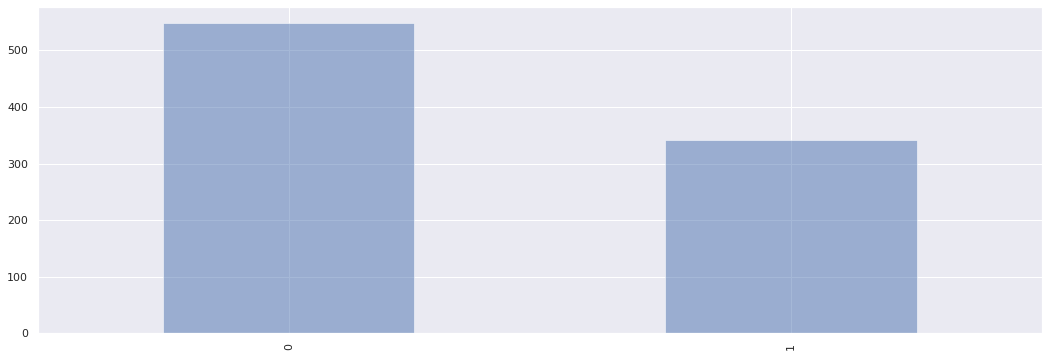

In [172]:
import matplotlib.pyplot as plt       ## wonderful library for data plotting
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure

_=titanic.Survived.value_counts().plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

### Beobachtungen:
- ca. 350 Menschen haben überlebt (1)
- ca. 550 Menschen haben nicht überlebt (0)


# Allegemeine Übersicht

In [173]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Beobachtungen:
- target feature = "survived"
- 38% survived --> wenn der Predictor jeden Fall zu "not survived" deklariert wird er damit in 62% der Fälle richtig liegen
- Alter der Passagiere reicht von ca. 0.4 bis 80 Jahre

# "Survived" in Abhängigkeit von "Pclass"

In [174]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### Beobachtungen:
- 1. Personenklasse: 62% überleben
- 2. Personenklasse: 47% überleben
- 3. Personenklasse: 24% überleben

# "Survived" in Abhängigkeit von "Age" und "female", "male"

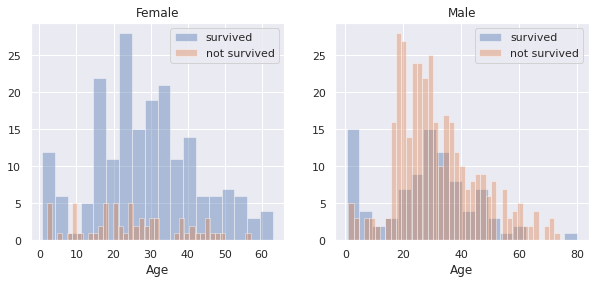

In [175]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#### Beobachtungen:
- Male: hohe Überlebenswahrscheinlichkeit zwischen 18 und 30 Jahren
- Female: hohe Überlebenswahrscheinlichkeit zwischen 15 und 35 Jahren
- Säuglinge unabhängig vom Geschlecht relativ hohe Überlebenswahrscheinlichkeit

# "Survived" in Abhängigkeit von "Pclass" und "female", "male"

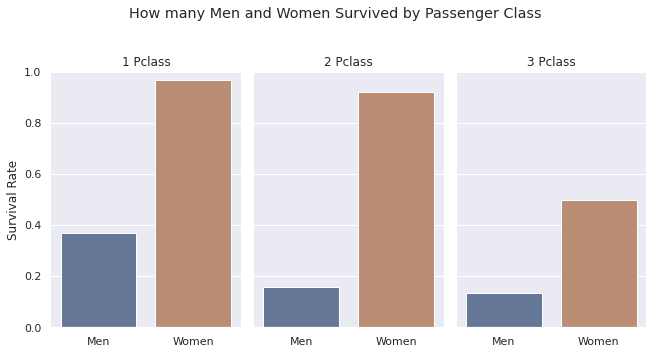

In [176]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

### Beobachtungen:
- Frauen haben unabhängig von der Klasse eher überlebt als Männer
- Passagiere der 1. Klasse haben eher überlebt als die der 2. und 3. Klasse
- Frauen aus der 2. Klasse haben anteilig fast gleich viel überlebt wie Frauen aus der 1. Klasse
- es überlebten wenige Passagiere der 3. Klasse

# Berechnug der fehlenden Werte im Dataset:

In [177]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


### Beobachtungen:
- "Embarked": nur 2 fehlende Werte --> Ersetzung vornehmen ? 
- "Age": ca. 20% der Werte fehlen
- "Cabin" ca. 77% der Werte fehlen --> Feature nicht beachten?

# Data Preprocessing

-  "Name", "Ticket"  löschen
- fehlende Daten behandeln

In [178]:
drop_elements = [ 'Name', 'Ticket']
titanic = titanic.drop(drop_elements, axis=1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


### "Embarked":

- es fehlen nur zwei Werte: auffüllen mit dem häufigsten Wert

In [179]:
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [180]:
common_value = 'S'
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# KORREKTUR: ERGÄNZUNG

- da es nur zwei Werte sind wäre eine bessere Möglichkeit diese Werte einfach weg zu lassen

### "Age":

- anhand des mean values in "age" Zufallszahlen zum befüllen erstellen

In [181]:
import numpy as np
for dataset in data:
    mean = titanic["Age"].mean()
    std = titanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic["Age"].astype(int)
titanic["Age"].isnull().sum()

0

# KORREKTUR: ERGÄNZUNG

Es ist besser das Attribut "Age" zu löschen, da trotz berechneter Auffüllung der Daten der Eingriff zu groß wäre und die Daten verfälschen könnte.

### "Cabin":

In [182]:
print('Fehlende Werte: '+str(titanic['Cabin'].isnull().sum()))

Fehlende Werte: 687


- "Cabin" könnte aufgrund der hohen Anzahl an fehlenden Werten einfach gelöscht werden
- um zu einem aussagekräftigem Ergebnis zu kommen wird vorher "has_cabin" aus "cabin" erstellt

In [183]:
titanic['Has_Cabin'] = titanic["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,male,22,1,0,7.2500,NaN,S,0
1,2,1,1,female,38,1,0,71.2833,C85,C,1
2,3,1,3,female,26,0,0,7.9250,NaN,S,0
3,4,1,1,female,35,1,0,53.1000,C123,S,1
4,5,0,3,male,35,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,NaN,S,0
887,888,1,1,female,19,0,0,30.0000,B42,S,1
888,889,0,3,female,19,1,2,23.4500,NaN,S,0
889,890,1,1,male,26,0,0,30.0000,C148,C,1
